In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d



#Read_csv will read a csv file and put it in pandas DataFrame.
Players_Data = pd.read_csv('fifadataset.csv')
#Setting the date colum to a datetime format.
Players_Data['Joined'] = pd.to_datetime(Players_Data['Joined'])
#Sorting players by date to keep only the leatest attributes in a  descending order,as some players
#are registered in different clubs due to transfers.
Players_Data = Players_Data[~Players_Data.Position.isnull()].sort_values('Joined', ascending=False)
#keeping the first as it will be the leatest attributes and club for the player.
Players_Data = Players_Data.drop_duplicates(subset='Name', keep='first')
#Resort Players by making top players first
Players_Data = Players_Data.sort_values('Overall', ascending=False)
#Re-arrange the DataFrame's indexing
#drop=True --> To delete the old indexing after sorting
Players_Data = Players_Data.reset_index(drop=True)
Players_Data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
1,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M


Text(0.5, 1.0, 'Players Ages Probabilites')

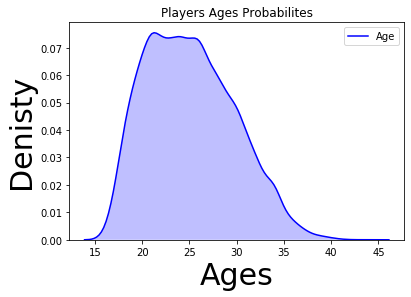

In [2]:
#Get age of all players
age_player = Players_Data["Age"]

sns.kdeplot(age_player,shade=True, color="b")
plt.xlabel('Ages', fontsize=30)
plt.ylabel('Denisty', fontsize=30)
plt.title('Players Ages Probabilites')

Text(0.5, 1.0, 'Players Rating Probabilites')

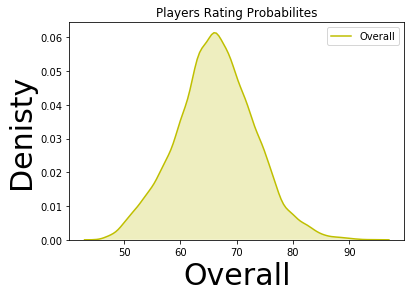

In [3]:
#Get ratings of all players
Overall_player = Players_Data["Overall"]

sns.kdeplot(Overall_player,shade=True, color="y")
plt.xlabel('Overall', fontsize=30)
plt.ylabel('Denisty', fontsize=30)
plt.title('Players Rating Probabilites')

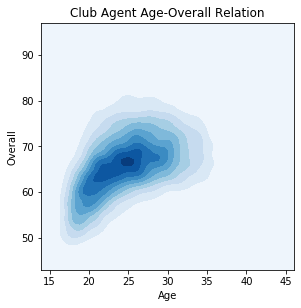

In [4]:
#Club agent - overall relation
Club_Agents = Players_Data[Players_Data.Club != 'Free Agents']

fig = plt.figure(figsize=(10, 10))
ax2 = fig.add_subplot(221)
ax2.set_title('Club Agent Age-Overall Relation')

sns.kdeplot(Players_Data.Age,Players_Data.Overall, shade=True,cmap="Blues",ax=ax2)

#Shows that over all of a player increases as the age increases

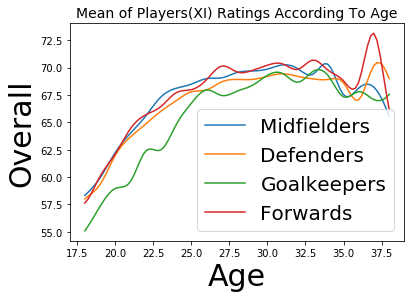

In [5]:
#Lists of all positions
Defenders_POS =['CB','RCB','LCB','RB','LB','LWB','RWB']
Strikers_POS =['CF','RW','LW','RF','LF','RS','LS','ST']
Midfielders_POS =['CDM','CM','CAM','RM','LM','LCM','RCM','LDM','RDM','LAM','RAM']
GoalKeepers_POS =['GK']

#Get all defenders data
defenders = Players_Data[Players_Data.Position.isin(Defenders_POS)]
#Groupby Age and Ratings as These are the only data we need for rating analysis
group = defenders.groupby("Age")["Overall"].mean().reset_index()
#Get defenders age data
age_DF = group["Age"]
#Get defenders rating data
rating_DF = group["Overall"]
#Interpolate for a better plotting-->[to predict the missing values between given data]
FAR_DF = interp1d(age_DF, rating_DF, kind='cubic')


#Get all strikers data
Strikers = Players_Data[Players_Data.Position.isin(Strikers_POS)]
group = Strikers.groupby("Age")["Overall"].mean().reset_index()
age_ST = group["Age"]
rating_ST = group["Overall"]
FAR_ST = interp1d(age_ST, rating_ST, kind='cubic')


#Get all midfielders data
Midfielders = Players_Data[Players_Data.Position.isin(Midfielders_POS)]
group = Midfielders.groupby("Age")["Overall"].mean().reset_index()
age_MF = group["Age"]
rating_MF = group["Overall"]
FAR_MF = interp1d(age_MF, rating_MF, kind='cubic')

#Get all goalkeepers data
goalkeepers = Players_Data[Players_Data.Position.isin(GoalKeepers_POS)]
group = goalkeepers.groupby("Age")["Overall"].mean().reset_index()
age_GK = group["Age"]
rating_GK = group["Overall"]
FAR_GK = interp1d(age_GK, rating_GK, kind='cubic')

#Players age range to be predictied on using interpolated data
agenew = np.linspace(18,38, num=100, endpoint=True)


plt.xlabel('Age', fontsize=30)
plt.ylabel('Overall', fontsize=30)
plt.title('Mean of Players(XI) Ratings According To Age',fontsize=14)
plt.plot( agenew, FAR_MF(agenew), "-", agenew, FAR_DF(agenew), "-",agenew, FAR_GK(agenew), "-",agenew, FAR_ST(agenew), "-")
plt.legend(["Midfielders", "Defenders","Goalkeepers","Forwards"], loc='best', fontsize = 20)

In [6]:
#function to calculate correlation between attributes
def correlation(x,y):
    
    std_x = (x-x.mean())/x.std(ddof=0)
    std_y = (y-y.mean())/y.std(ddof=0)

    return (std_x*std_y).mean()

In [7]:
#function to add attributes to each player based on fifa calculations
def Calculate_Players_Attributes(test):

    for index, row in test.iterrows():
        
        test['BallSkills'] = (test['BallControl']+test['Dribbling'])/2
        test['Defence'] = (test['Marking']+test['StandingTackle']+test['SlidingTackle'])/3
        test['Mental'] = (test['Aggression']+test['Reactions']+test['Positioning']+test['Interceptions']+test['Vision'])/5
        test['Passing'] = (test['Crossing']+test['ShortPassing']+test['LongPassing'])/3
        test['Physical'] = (test['Acceleration']+test['Stamina']+test['Strength']+test['Balance']+test['SprintSpeed']+test['Agility']+test['Jumping'])/7
        test['Shooting'] = (test['HeadingAccuracy']+test['ShotPower']+test['Finishing']+test['LongShots']+test['Curve']+test['FKAccuracy']+test['Penalties']+test['Volleys'])/8
        test['GoalKeeping'] = (test['GKPositioning']+test['GKDiving']+test['GKHandling']+test['GKReflexes']+test['GKKicking'])/5
    
    return test    

In [8]:
#we could have used apply,but this way is simpler
Players_attributes = Calculate_Players_Attributes(Players_Data)
Players_attributes.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKPositioning,GKReflexes,Release Clause,BallSkills,Defence,Mental,Passing,Physical,Shooting,GoalKeeping
0,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,14.0,11.0,€127.1M,91.0,27.333333,73.0,80.666667,85.571429,87.500,11.6
1,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,14.0,8.0,€226.5M,96.5,29.000000,70.6,87.000000,80.285714,86.500,10.8
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,15.0,11.0,€228.1M,95.5,28.000000,72.4,80.333333,79.285714,81.375,11.8
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,88.0,94.0,€138.6M,30.0,16.333333,47.6,39.333333,56.000000,21.250,88.8
4,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,7.0,11.0,€104.6M,73.5,90.000000,77.2,73.666667,79.285714,72.000,9.2


In [9]:
#Now Lets See what are the attributes that effect a player's definsive performance
print(correlation(Players_attributes['Defence'],Players_attributes['Mental']))

0.6790394460297583


In [10]:
#there is a good correlation between the mentality of the player and his definsive performance,but which attributes in mentality that actually effect the definsive performance of a player ?
print(correlation(Players_attributes['Defence'],Players_attributes['Aggression']))

0.7492687093149921


In [11]:
print(correlation(Players_attributes['Defence'],Players_attributes['Interceptions']))

#From the above data we can see that player's Interception and aggression have an effect on the defence, so if you want to be a better defender you will have to improve your mentality and specially your interceptions and aggresion.

0.9432644627771327


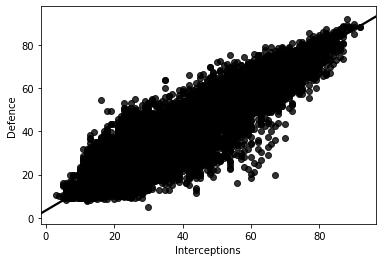

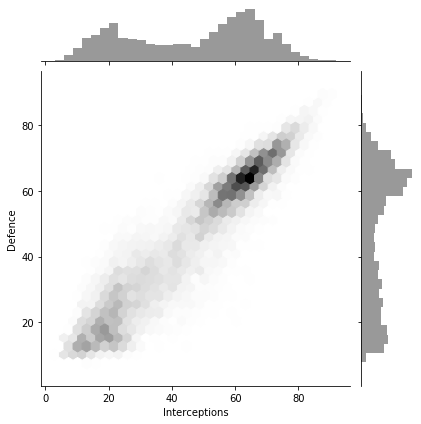

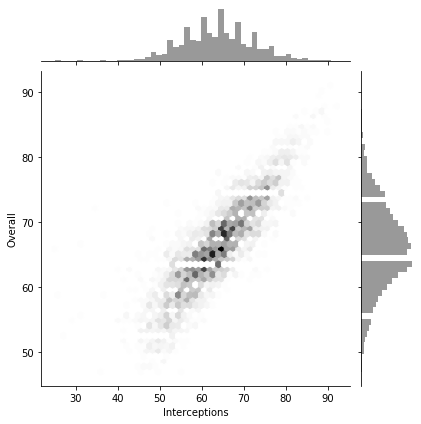

In [12]:
#Now Let's visualize the relation between defense[interception,aggression] and the relation between rating[interception,aggression]
sns.regplot(x="Interceptions", y="Defence", data=Players_attributes,color="k")
sns.jointplot(x='Interceptions',y='Defence',data=Players_attributes, kind='hex', color="k")

sns.jointplot(x='Interceptions',y='Overall',data=defenders, kind='hex', color="k")

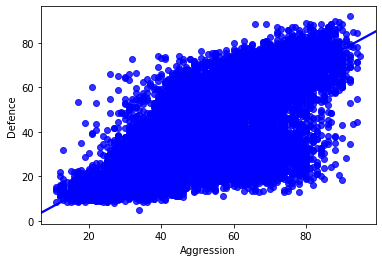

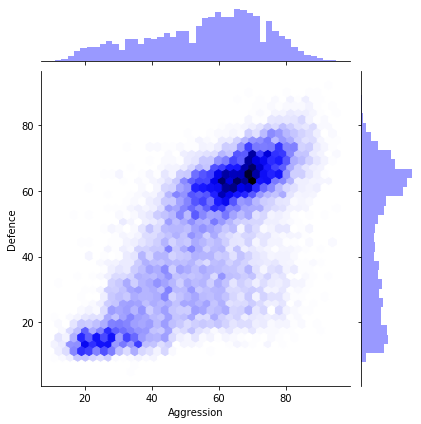

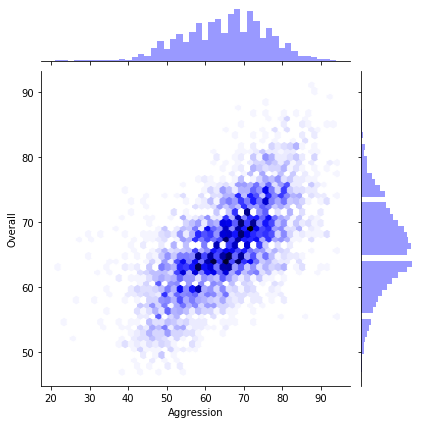

In [13]:
sns.regplot(x="Aggression", y="Defence", data=Players_attributes,color="b")
sns.jointplot(x='Aggression',y='Defence',data=Players_attributes, kind='hex', color="b")

#Get all defenders data
sns.jointplot(x='Aggression',y='Overall',data=defenders, kind='hex', color="b")

In [14]:
#if we went further in searching for correlations between players attributes, we will find that the player with higher ballskills will most probably have a high ball agility which increase his performance in shooting and passing.

In [15]:
print(correlation(Players_attributes['Passing'],Players_attributes['BallSkills']))

0.8961203265028636


In [16]:
print(correlation(Players_attributes['Shooting'],Players_attributes['BallSkills']))

0.9046140695979001
